<a href="https://colab.research.google.com/github/SyedT1/Data-Mining-CSC417/blob/main/Week%202/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
path = 'https://raw.githubusercontent.com/SyedT1/Data-Mining-CSC417/main/Week%201/datasets/iris.data'
cols = ['sepal_len','sepal_wid','petal_len','petal_wid','name']
df = pd.read_csv(path,names = cols)
print(df)
species = [i for i in set(df['name'])]
species = species[::-1]
print(species)
df = df.drop('petal_wid',axis=1)

     sepal_len  sepal_wid  petal_len  petal_wid            name
0          5.1        3.5        1.4        0.2     Iris-setosa
1          4.9        3.0        1.4        0.2     Iris-setosa
2          4.7        3.2        1.3        0.2     Iris-setosa
3          4.6        3.1        1.5        0.2     Iris-setosa
4          5.0        3.6        1.4        0.2     Iris-setosa
..         ...        ...        ...        ...             ...
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

[150 rows x 5 columns]
['Iris-virginica', 'Iris-setosa', 'Iris-versicolor']


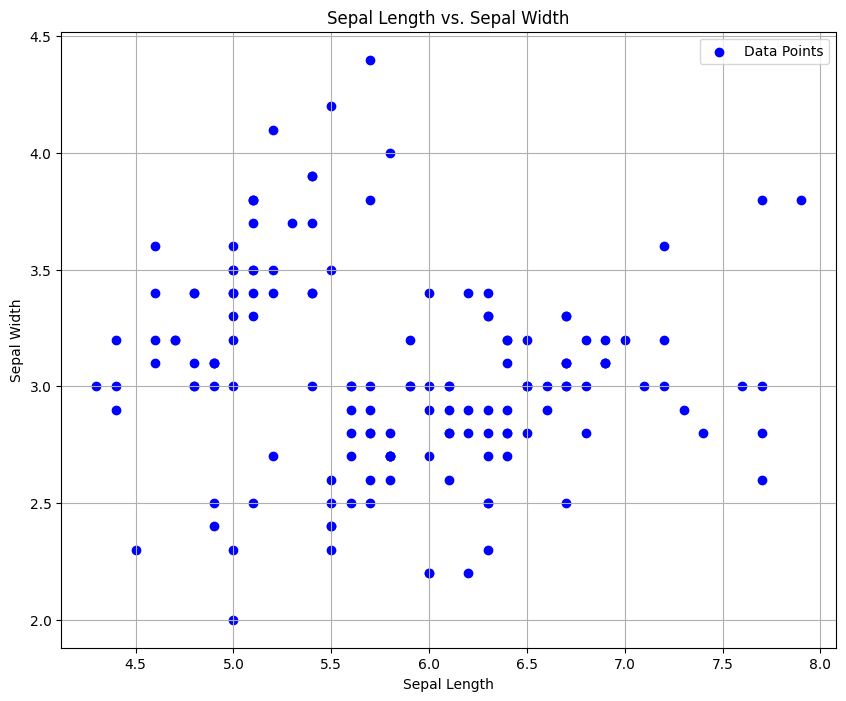

In [11]:
# 1. Plot the data points using the first two dimensions (Sepal Length and Sepal Width) .
sepal_length = df['sepal_len']
sepal_width =  df['sepal_wid']
plt.figure(figsize=(10,8))
plt.scatter(sepal_length, sepal_width, c='blue', marker='o', label='Data Points')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs. Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

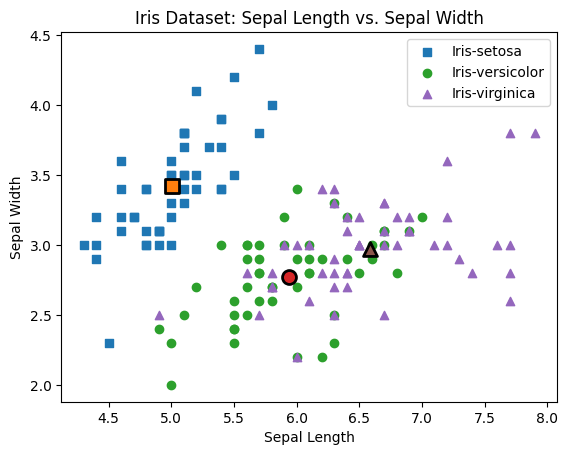

In [12]:
import matplotlib.pyplot as plt
 # 2. Use three different shapes (triangle, square, circle) to plot datapoints for three different classes. You should use the class information from class label and use them when you decide on shapes (see slide 6 and slide 10)
class_shape_map = {
    'Iris-setosa': 's',       # square
    'Iris-versicolor': 'o',   # circle
    'Iris-virginica': '^',    # triangle
}
class_means = df.groupby('name').mean()[['sepal_len', 'sepal_wid']]

for class_label, marker_shape in class_shape_map.items():
    class_data = df[df['name'] == class_label]
    mean_point = class_means.loc[class_label]
    plt.scatter(class_data['sepal_len'], class_data['sepal_wid'], marker=marker_shape, label=class_label)
    # 3. Calculate the mean data point for each class and show them with similar shape with the larger size.
    plt.scatter(mean_point['sepal_len'], mean_point['sepal_wid'], marker=marker_shape, s=100,edgecolors='k', linewidth=2)

# Set plot labels and title
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset: Sepal Length vs. Sepal Width')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [13]:
class_means = df.groupby('name').mean()[['sepal_len', 'sepal_wid']]

# 4. Calculate the centered version of Sepal Length and Sepal Width
centered_sepal_length = df['sepal_len'] - df['name'].map(class_means['sepal_len'])
centered_sepal_width = df['sepal_wid'] - df['name'].map(class_means['sepal_wid'])
df['Centered Sepal Length'] = centered_sepal_length
df['Centered Sepal Width'] = centered_sepal_width
print(df)

     sepal_len  sepal_wid  petal_len            name  Centered Sepal Length  \
0          5.1        3.5        1.4     Iris-setosa                  0.094   
1          4.9        3.0        1.4     Iris-setosa                 -0.106   
2          4.7        3.2        1.3     Iris-setosa                 -0.306   
3          4.6        3.1        1.5     Iris-setosa                 -0.406   
4          5.0        3.6        1.4     Iris-setosa                 -0.006   
..         ...        ...        ...             ...                    ...   
145        6.7        3.0        5.2  Iris-virginica                  0.112   
146        6.3        2.5        5.0  Iris-virginica                 -0.288   
147        6.5        3.0        5.2  Iris-virginica                 -0.088   
148        6.2        3.4        5.4  Iris-virginica                 -0.388   
149        5.9        3.0        5.1  Iris-virginica                 -0.688   

     Centered Sepal Width  
0                   0.0

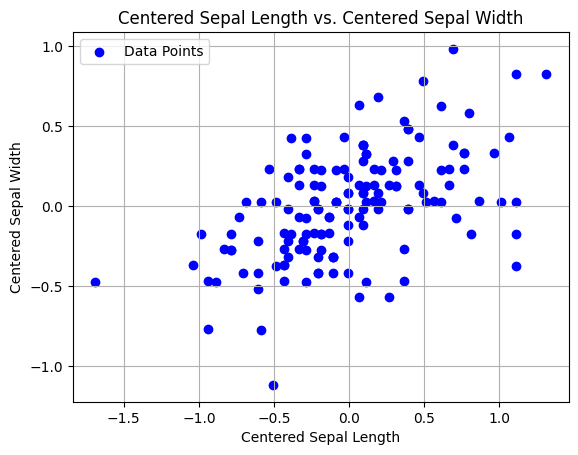

In [14]:
plt.scatter(centered_sepal_length, centered_sepal_width, c='blue', marker='o', label='Data Points')
plt.xlabel('Centered Sepal Length')
plt.ylabel('Centered Sepal Width')
plt.title('Centered Sepal Length vs. Centered Sepal Width')
plt.legend()
plt.grid(True)
plt.show()

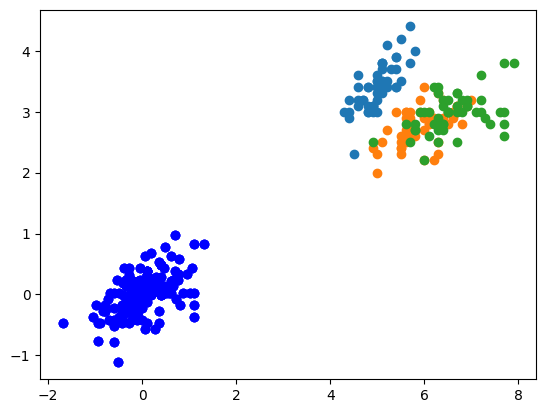

In [15]:
# Comparison
for class_label, marker_shape in class_shape_map.items():
    class_data = df[df['name'] == class_label]
    plt.scatter(class_data['sepal_len'], class_data['sepal_wid'], marker='o', label='Data Points')
    plt.scatter(centered_sepal_length, centered_sepal_width, c='blue', marker='o', label='Centered Data Points')
# plt.grid(True)

In [21]:
centered_sepal_length

0      0.094
1     -0.106
2     -0.306
3     -0.406
4     -0.006
       ...  
145    0.112
146   -0.288
147   -0.088
148   -0.388
149   -0.688
Length: 150, dtype: float64

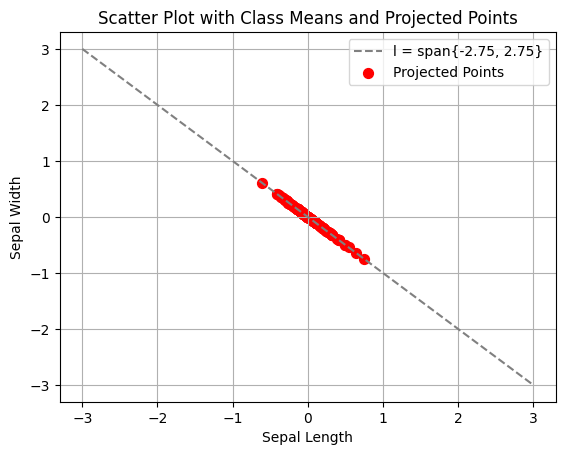

In [25]:
import numpy as np
x2_values = np.linspace(-3, 3, 100)  # Generate 100 points between -3 and 3 for x2
x1_values = -x2_values
plt.plot(x2_values, x1_values, linestyle='--', color='gray', label='l = span{-2.75, 2.75}')
centered_data = df.iloc[:,-2:]
# 6: Calculate the projection of each data point on the line l
projection = np.dot(centered_data, [-2.75, 2.75]) / np.linalg.norm([-2.75, 2.75])**2

# 7: Plot the projected points on the line with smaller size
plt.scatter(-2.75 * projection, 2.75 * projection, marker='o', color='red', s=50, label='Projected Points')

# Add labels, title, and legend
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot with Class Means and Projected Points')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

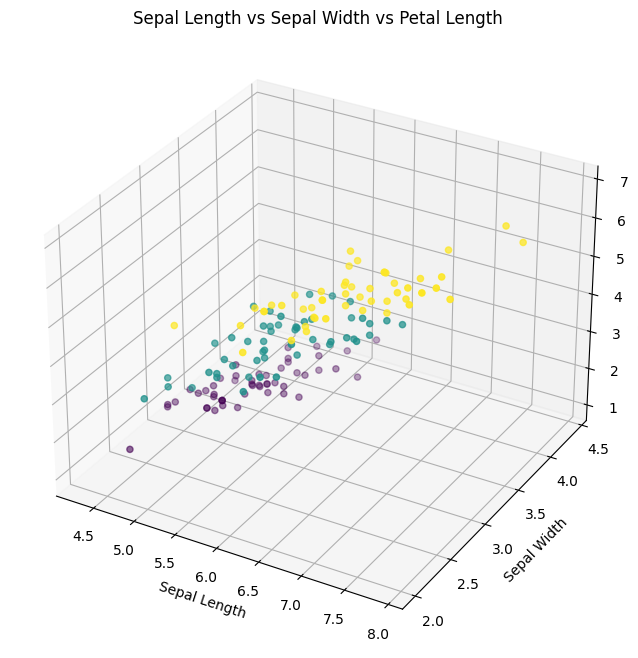

In [16]:
# 1.in 3D Plot the data points using the first three dimensions (Sepal Length, Sepal Width, Petal Length) .

from mpl_toolkits.mplot3d import Axes3D

def marklabel(x):
  return 1 if x=='Iris-setosa' else (2 if x == 'Iris-versicolor' else 3)
target = [marklabel(i) for i in np.array(df['name'])]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(np.array(df['sepal_len']),np.array(df['sepal_wid']), np.array(df['petal_len']), c=target, cmap='viridis', marker='o')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('Sepal Length vs Sepal Width vs Petal Length')
plt.show()

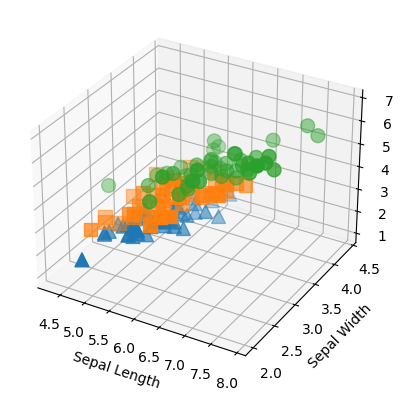

In [44]:

class0_data = np.array(df[df['name']=='Iris-setosa'].iloc[:,:3])
class1_data = np.array(df[df['name']=='Iris-versicolor'].iloc[:,:3])
class2_data = np.array(df[df['name']=='Iris-virginica'].iloc[:,:3])

#2. Use three different shapes (triangle, square, circle) to plot datapoints for three different classes. You should use the class information from class label and use them when you decide on shapes (see slide 6 and slide 10)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0_data[:, 0], class0_data[:, 1], class0_data[:, 2], marker='^', label='Class 0', s=100)
ax.scatter(class1_data[:, 0], class1_data[:, 1], class1_data[:, 2], marker='s', label='Class 1', s=100)
ax.scatter(class2_data[:, 0], class2_data[:, 1], class2_data[:, 2], marker='o', label='Class 2', s=100)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.show()

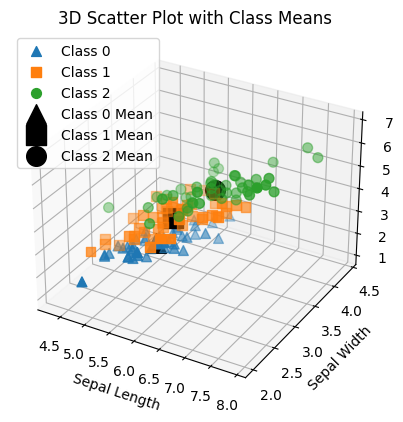

In [48]:
#3. Calculate the mean data point (3D) for each class and show them with similar shape with the larger size.
class0_mean = np.mean(class0_data, axis=0)
class1_mean = np.mean(class1_data, axis=0)
class2_mean = np.mean(class2_data, axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0_data[:, 0], class0_data[:, 1], class0_data[:, 2], marker='^', label='Class 0', s=50)
ax.scatter(class1_data[:, 0], class1_data[:, 1], class1_data[:, 2], marker='s', label='Class 1', s=50)
ax.scatter(class2_data[:, 0], class2_data[:, 1], class2_data[:, 2], marker='o', label='Class 2', s=50)

ax.scatter(class0_mean[0], class0_mean[1], class0_mean[2], marker='^', color='black', s=200, label='Class 0 Mean')
ax.scatter(class1_mean[0], class1_mean[1], class1_mean[2], marker='s', color='black', s=200, label='Class 1 Mean')
ax.scatter(class2_mean[0], class2_mean[1], class2_mean[2], marker='o', color='black', s=200, label='Class 2 Mean')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot with Class Means')
ax.legend()

plt.show()

In [49]:
#4. Calculate the centered version of (Sepal Length, Sepal Width, Petal Length)
centered_data = df.iloc[:,:3] - np.mean(df.iloc[:,:3], axis=0)

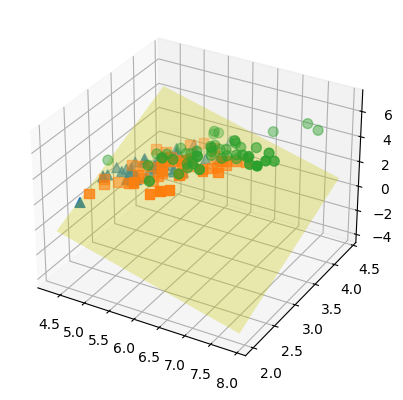

In [70]:
#5. Now, plot the plane (with yellow plane) spanned by two normal vector( [1 - 2, 1 ]T, [2, 1, 0]T )
class0_mean = np.mean(class0_data, axis=0)
class1_mean = np.mean(class1_data, axis=0)
class2_mean = np.mean(class2_data, axis=0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class0_data[:, 0], class0_data[:, 1], class0_data[:, 2], marker='^', label='Class 0', s=50)
ax.scatter(class1_data[:, 0], class1_data[:, 1], class1_data[:, 2], marker='s', label='Class 1', s=50)
ax.scatter(class2_data[:, 0], class2_data[:, 1], class2_data[:, 2], marker='o', label='Class 2', s=50)

x = np.linspace(np.min(np.array(df.iloc[:,0])), np.max(np.array(df.iloc[:,0])), 100)
y = np.linspace(np.min(np.array(df.iloc[:,1])), np.max(np.array(df.iloc[:,1])), 100)
X, Y = np.meshgrid(x, y)
Z = (-1 * X + 2 * Y) / 1  # Plane equation: z = (-x + 2y) / 1
ax.plot_surface(X, Y, Z, color='yellow', alpha=0.3)
plt.show()

In [1]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/SyedT1/Data-Mining-CSC417/main/Week%202/magic04.data')
data

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [9]:
import numpy as np
import matplotlib.pyplot as plt

real_attributes = data.iloc[:500, :9]
#1. Compute the multivariate mean vector
mean_vector = real_attributes.mean()
print(mean_vector)
print(mean_vector.shape)

28.7967    44.565185
16.0021    18.985794
2.6449      2.809623
0.3918      0.373393
0.1982      0.211531
27.7004     3.999650
22.011     18.036520
-8.2027    -0.013790
40.092     19.009359
dtype: float64
(9,)


In [10]:
#2. Compute the sample covariance matrix as inner products between the columns of the centered data matrix (see Eq. (2.38) in chapter 2).
centered_data = real_attributes - mean_vector
cov_inner = np.dot(centered_data.T, centered_data) / (len(centered_data) - 1)
print(cov_inner)

[[ 6.36251736e+02  1.69471474e+02  9.00204904e+00 -3.17116627e+00
  -1.83142485e+00 -6.86737065e+01  4.56359942e+02  4.10759338e+00
  -2.44778327e+02]
 [ 1.69471474e+02  9.37597356e+01  3.47013204e+00 -1.19382853e+00
  -6.94517010e-01  1.69670393e+01  1.11746010e+02 -3.60066561e+00
  -5.00265713e+01]
 [ 9.00204904e+00  3.47013204e+00  2.08643742e-01 -6.79368415e-02
  -3.92124298e-02  1.04174708e+00  8.80669943e+00  1.12801160e-01
  -4.62626286e+00]
 [-3.17116627e+00 -1.19382853e+00 -6.79368415e-02  3.00717959e-02
   1.79344361e-02 -4.28538509e-01 -2.80165505e+00 -8.71054425e-02
   1.97357766e+00]
 [-1.83142485e+00 -6.94517010e-01 -3.92124298e-02  1.79344361e-02
   1.12665715e-02 -2.54953322e-01 -1.65524507e+00 -6.89539075e-02
   1.15899280e+00]
 [-6.86737065e+01  1.69670393e+01  1.04174708e+00 -4.28538509e-01
  -2.54953322e-01  1.50660652e+03  2.09163384e+02 -1.08499748e+01
   1.74473023e+01]
 [ 4.56359942e+02  1.11746010e+02  8.80669943e+00 -2.80165505e+00
  -1.65524507e+00  2.0916338

In [11]:

#3. Compute the sample covariance matrix as outer product between the centered data points (see Eq. (2.39) in chapter 2)
cov_outer = np.outer(centered_data.T, centered_data) / (len(centered_data) - 1)
print(cov_outer)

[[ 3.36678708e-01  1.88638944e-01  7.56196509e-03 ...  6.04405173e-01
  -1.27831090e-01 -9.71239359e-01]
 [-3.05173406e+00 -1.70986723e+00 -6.85434091e-02 ... -5.47846897e+00
   1.15869071e+00  8.80353929e+00]
 [ 5.38931378e-01  3.01959831e-01  1.21046570e-02 ...  9.67488900e-01
  -2.04622936e-01 -1.55469103e+00]
 ...
 [ 4.60862486e-01  2.58218327e-01  1.03511922e-02 ...  8.27339729e-01
  -1.74981526e-01 -1.32948053e+00]
 [ 4.39923943e-01  2.46486593e-01  9.88090252e-03 ...  7.89750882e-01
  -1.67031523e-01 -1.26907772e+00]
 [-9.71239359e-01 -5.44179249e-01 -2.18145013e-02 ... -1.74356762e+00
   3.68762809e-01  2.80179848e+00]]


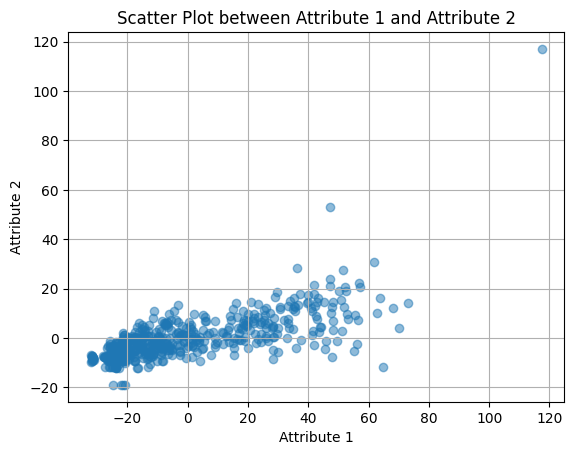

In [12]:
#4. Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute vectors. Use vector notations shown in class. Plot the scatter plot between these two attributes.
attribute_1 = centered_data.iloc[:, 0]
attribute_2 = centered_data.iloc[:, 1]
correlation = np.dot(attribute_1, attribute_2) / (np.linalg.norm(attribute_1) * np.linalg.norm(attribute_2))
plt.scatter(attribute_1, attribute_2, alpha=0.5)
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Scatter Plot between Attribute 1 and Attribute 2')
plt.grid(True)
plt.show()